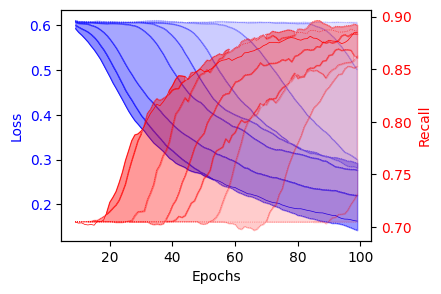

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

InDL = True
dataset_folder = "dataset03"
exp_name = f"{dataset_folder}_ablation_study_2"
max_depth = 10

# Assuming df is your DataFrame and it has columns 'Loss' and 'Class 0 Recall'

fig, ax1 = plt.subplots(figsize=(4,3))

ax1.set_ylabel('Loss', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')  
ax1.set_xlabel('Epochs')
 
ax2 = ax1.twinx() 
ax2.set_ylabel('Recall', color='red')
ax2.tick_params(axis='y', labelcolor='red')

previous_df = None
for i in range(max_depth):
    df = pd.DataFrame(columns=['Loss', 'Recall'])
    
    model_name = f"{i}-net"
    if InDL:
        model_name = f"{model_name}-InDL"
    else:
        model_name = f"{model_name}-MNIST"
    
    history_path = f'./models/{exp_name}/{model_name}_history.csv'
        
    df = pd.read_csv(history_path)
    
    df['Loss'] = df['Loss'].rolling(window=10).mean()
    df['Recall'] = df['Recall'].rolling(window=10).mean()

    if i == 0:
        sns.lineplot(data=df, x=df.index, y='Loss', ax=ax1, color='blue', linewidth=0.5)
        sns.lineplot(data=df, x=df.index, y='Recall', ax=ax2, color='red', linewidth=0.5)
    # elif i == max_depth-1:
    #     sns.lineplot(data=df, x=df.index, y='Loss', ax=ax1, color='blue', linestyle="--", linewidth=0.5)
    #     sns.lineplot(data=df, x=df.index, y='Recall', ax=ax2, color='red', linestyle="--", linewidth=0.5)
    else:
        ax1.fill_between(range(100), previous_df["Loss"], df["Loss"], where=(df["Loss"]>previous_df["Loss"]), color='blue', alpha=0.05*(max_depth-i))
        ax2.fill_between(range(100), previous_df["Recall"], df["Recall"], where=(df["Recall"]<previous_df["Recall"]), color='Red', alpha=0.05*(max_depth-i))

        sns.lineplot(data=df, x=df.index, y='Loss', ax=ax1, color='blue', linestyle=":", alpha=0.1*(max_depth-i), linewidth=0.5)
        sns.lineplot(data=df, x=df.index, y='Recall', ax=ax2, color='red', linestyle=":", alpha=0.1*(max_depth-i), linewidth=0.5)

    previous_df = df
    
plt.savefig("ablation_study_result.pdf", format="pdf", bbox_inches='tight', pad_inches= 0.0)

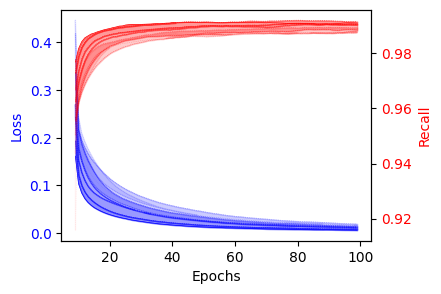

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

InDL = False
dataset_folder = "dataset03"
exp_name = f"{dataset_folder}_ablation_study_2_ref"
max_depth = 10

# Assuming df is your DataFrame and it has columns 'Loss' and 'Class 0 Recall'

fig, ax1 = plt.subplots(figsize=(4,3))

ax1.set_ylabel('Loss', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')  
ax1.set_xlabel('Epochs')
 
ax2 = ax1.twinx() 
ax2.set_ylabel('Recall', color='red')
ax2.tick_params(axis='y', labelcolor='red')

previous_df = None
for i in range(max_depth):
    df = pd.DataFrame(columns=['Loss', 'Recall'])
    
    model_name = f"{i}-net"
    if InDL:
        model_name = f"{model_name}-InDL"
    else:
        model_name = f"{model_name}-MNIST"
    
    history_path = f'./models/{exp_name}/{model_name}_history.csv'
        
    df = pd.read_csv(history_path)
    
    df['Loss'] = df['Loss'].rolling(window=10).mean()
    df['Recall'] = df['Recall'].rolling(window=10).mean()

    if i == 0:
        sns.lineplot(data=df, x=df.index, y='Loss', ax=ax1, color='blue', linewidth=0.5)
        sns.lineplot(data=df, x=df.index, y='Recall', ax=ax2, color='red', linewidth=0.5)
    # elif i == max_depth-1:
    #     sns.lineplot(data=df, x=df.index, y='Loss', ax=ax1, color='blue', linestyle="--", linewidth=0.5)
    #     sns.lineplot(data=df, x=df.index, y='Recall', ax=ax2, color='red', linestyle="--", linewidth=0.5)
    else:
        ax1.fill_between(range(100), previous_df["Loss"], df["Loss"], where=(df["Loss"]>previous_df["Loss"]), color='blue', alpha=0.05*(max_depth-i))
        ax2.fill_between(range(100), previous_df["Recall"], df["Recall"], where=(df["Recall"]<previous_df["Recall"]), color='Red', alpha=0.05*(max_depth-i))

        sns.lineplot(data=df, x=df.index, y='Loss', ax=ax1, color='blue', linestyle=":", alpha=0.1*(max_depth-i), linewidth=0.5)
        sns.lineplot(data=df, x=df.index, y='Recall', ax=ax2, color='red', linestyle=":", alpha=0.1*(max_depth-i), linewidth=0.5)

    previous_df = df
    
plt.savefig("ablation_study_ref.pdf", format="pdf", bbox_inches='tight', pad_inches= 0.0)